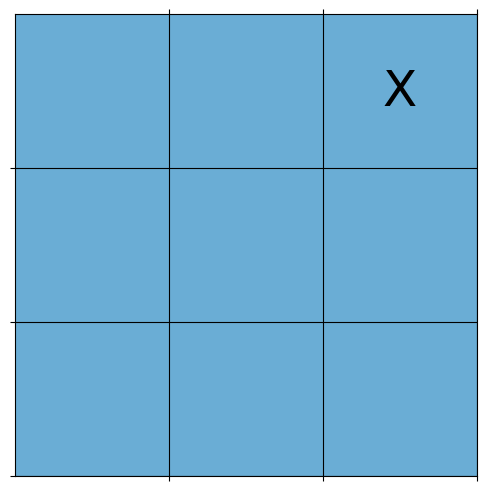

It's a draw!


In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to initialize the board
def initialize_board():
    return [[' ' for _ in range(3)] for _ in range(3)]

# Modified draw_board function
def draw_board(board, ax):
    ax.cla()  # Clear the previous board
    ax.matshow(np.zeros((3, 3)), cmap="Blues", vmin=-1, vmax=1)

    for i in range(3):
        for j in range(3):
            c = board[i][j]
            ax.text(j, i, c, va='center', ha='center', fontsize=36)

    ax.set_xticks([0.5, 1.5, 2.5])
    ax.set_xticklabels([])
    ax.set_yticks([0.5, 1.5, 2.5])
    ax.set_yticklabels([])
    ax.grid(color='black')
    plt.pause(0.5)  # Pause to view each move
    plt.show()

# Function to check if there's a winner
def check_winner(board, player):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all([board[i][j] == player for j in range(3)]) or \
           all([board[j][i] == player for j in range(3)]):
            return True

    if all([board[i][i] == player for i in range(3)]) or \
       all([board[i][2 - i] == player for i in range(3)]):
        return True

    return False

# Function to check if the board is full
def is_board_full(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

# AI logic to make a move
def ai_move(board, player):
    available_moves = [(i, j) for i in range(3) for j in range(3) if board[i][j] == ' ']
    move = random.choice(available_moves)
    board[move[0]][move[1]] = player

# Main function to play the game
def play_game():
    plt.ion()  # Turn on interactive mode
    board = initialize_board()
    fig, ax = plt.subplots(figsize=(6, 6))
    players = ['X', 'O']
    turn = 0
    winner = None
    while not winner and not is_board_full(board):
        player = players[turn % 2]
        ai_move(board, player)
        draw_board(board, ax)
        if check_winner(board, player):
            winner = player
        turn += 1

    if winner:
        print(f"Player {winner} wins!")
    else:
        print("It's a draw!")
        
# Run the game
play_game()